In [2]:
from skimage.io import imread
import numpy as np
from glob import glob
from fish.util.plot import proj_fuse

In [3]:
data = imread('/groups/ahrens/ahrenslab/davis/data/ngm/20170228_4_1_gfaprgeco_hucgc_6dpf_shorttrials_20170228_185002_gu_trig_ave.tif')

In [56]:
data.shape

(21, 29, 512, 512)

In [59]:
import flika as flk
flk.start_flika()
flk.window.Window(data[:,23])

Starting flika
flika menubar already initialized.
Starting flika inside IPython


In [26]:
flk.window.Window(data[ts[0]][:,256:,:] - data[ts[1]][:,256:,:])

[(-0.5, 685.5, -0.5, 429.5), (-0.5, 685.5, -0.5, 429.5)]

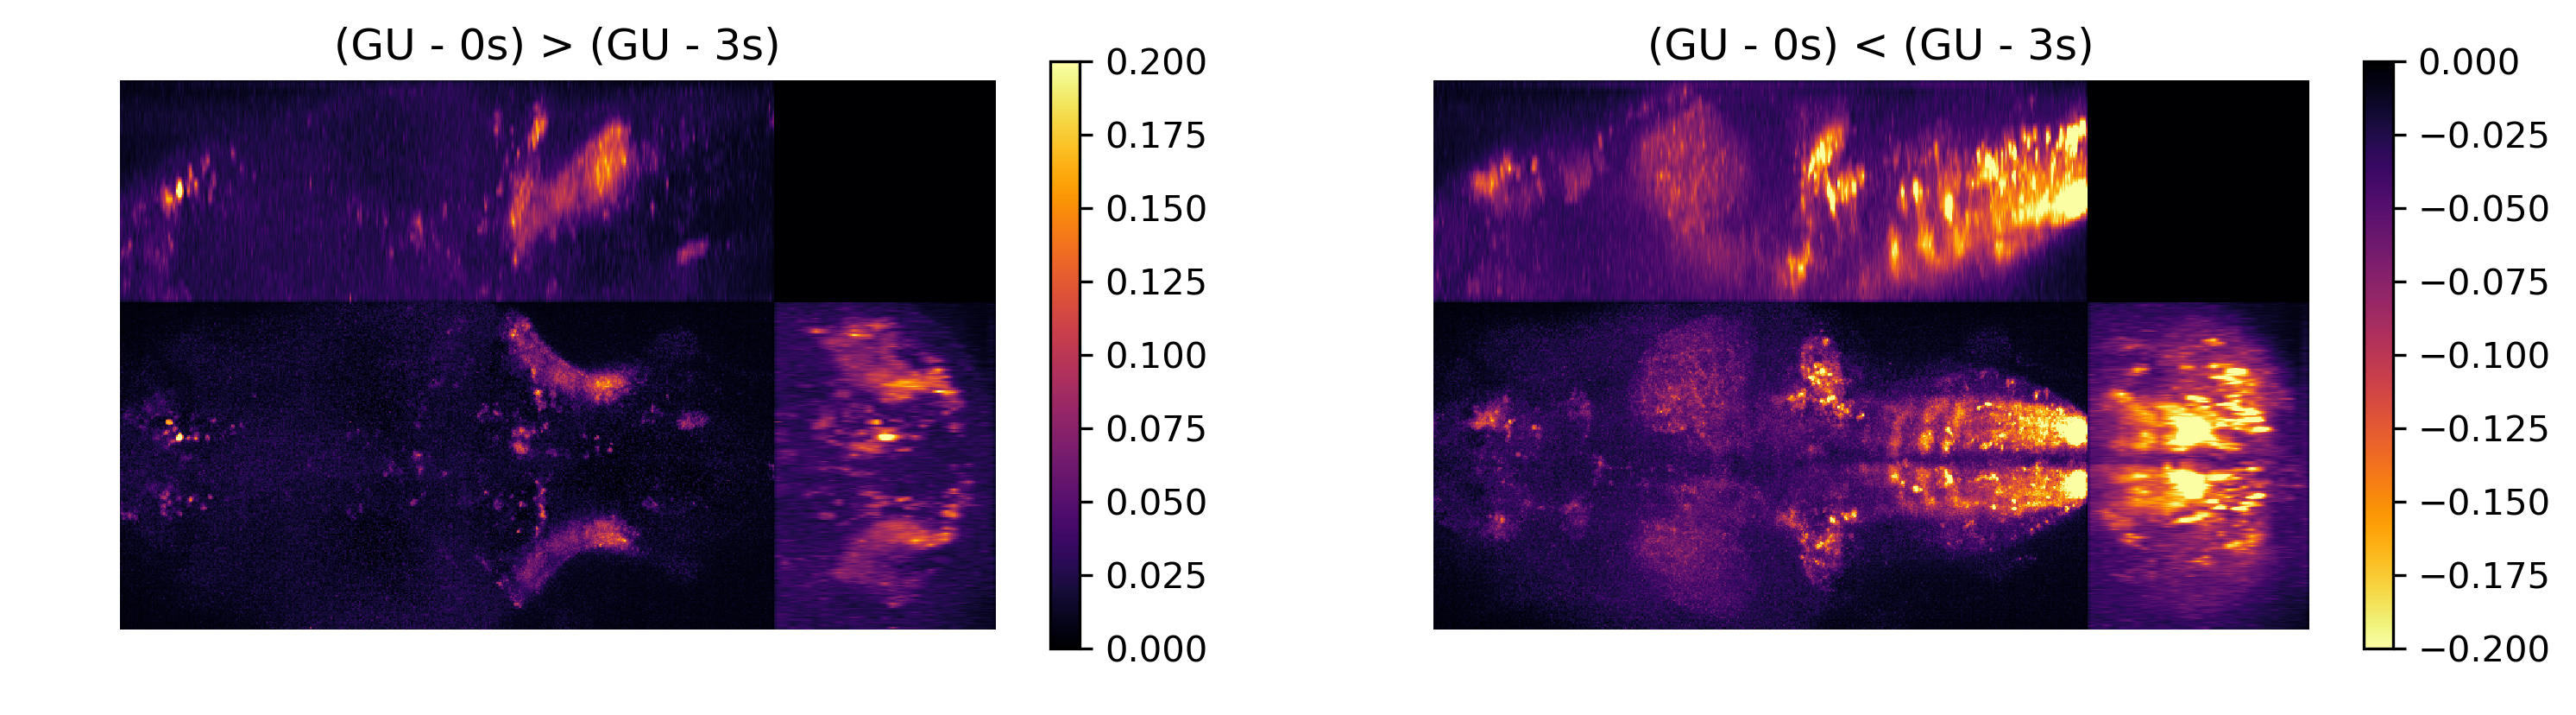

In [55]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, dpi=300, figsize=(12,3))
gu_t = 10
ts = (10,7)

im1= axs[0].imshow(proj_fuse(data[ts[0]][:,256:,:] - data[ts[1]][:,256:,:], np.max, aspect=(6,1,1)), origin='lower', cmap='inferno', clim=(0,.2))
plt.colorbar(im1, ax=axs[0])
im2=axs[1].imshow(proj_fuse(data[ts[0]][:,256:,:] - data[ts[1]][:,256:,:], np.min, aspect=(6,1,1)), origin='lower', cmap='inferno_r', clim=(-.2,0))
plt.colorbar(im2, ax=axs[1])

axs[0].title.set_text('(GU - {0}s) {2} (GU - {1}s)'.format(gu_t - ts[0], gu_t - ts[1], '>'))
axs[1].title.set_text('(GU - {0}s) {2} (GU - {1}s)'.format(gu_t - ts[0], gu_t - ts[1], '<'))
[ax.axis('off') for ax in axs]

In [5]:
from fish.image.zds import ZDS
dset = ZDS('/groups/ahrens/ahrenslab/davis/data/spim/raw/20180314/f1/5dpf_gfap_h2b_gcamp_x_huc_rgeco_x_ec43_opto_1_20180314_124124/')

In [6]:
dset.shape

(3515, 41, 1024, 2048)

In [7]:
from skimage.io import imread
import flika as flk
flk.start_flika()

Starting flika


/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Starting flika inside IPython


In [11]:
from glob import glob
glob(dset.path.replace('raw','proc') + '*')

['/groups/ahrens/ahrenslab/davis/data/spim/proc/20180314/f1/5dpf_gfap_h2b_gcamp_x_huc_rgeco_x_ec43_opto_1_20180314_124124/5dpf_gfap_h2b_gcamp_x_huc_rgeco_x_ec43_opto_1_20180314_124124.tif',
 '/groups/ahrens/ahrenslab/davis/data/spim/proc/20180314/f1/5dpf_gfap_h2b_gcamp_x_huc_rgeco_x_ec43_opto_1_20180314_124124/reg',
 '/groups/ahrens/ahrenslab/davis/data/spim/proc/20180314/f1/5dpf_gfap_h2b_gcamp_x_huc_rgeco_x_ec43_opto_1_20180314_124124/dff_metadata.json',
 '/groups/ahrens/ahrenslab/davis/data/spim/proc/20180314/f1/5dpf_gfap_h2b_gcamp_x_huc_rgeco_x_ec43_opto_1_20180314_124124/opto']

In [12]:
flk.window.Window(imread(dset.path.replace('raw','proc') + 'reg/anat_reference.tif'))

## Load a triggered median from disk and display composite projection

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from skimage.io import imread
fnames = ('/groups/ahrens/ahrenslab/davis/data/spim/proc/20180314/f1/5dpf_gfap_h2b_gcamp_x_huc_rgeco_x_ec43_opto_1_20180314_124124/opto/trial_median_condition_1.tif',
          '/nrs/ahrens/davis/data/spim/proc/20180328/5dpf_ec43xcy171xcy331_f1_opto_1_20180328_205506/opto/trial_median_condition_1.tif',
         '/nrs/ahrens/davis/data/spim/proc/20180406/7dpf_ec43xcy171xcy331_opto_1_20180406_121139/opto/trial_median_condition_1.tif')
data = [imread(f) for f in fnames]

In [9]:
import flika as flk
flk.start_flika()
flk.window.Window(data[2].max(1))

Starting flika
flika menubar already initialized.
Starting flika inside IPython


In [10]:
from fish.util.plot import proj_fuse

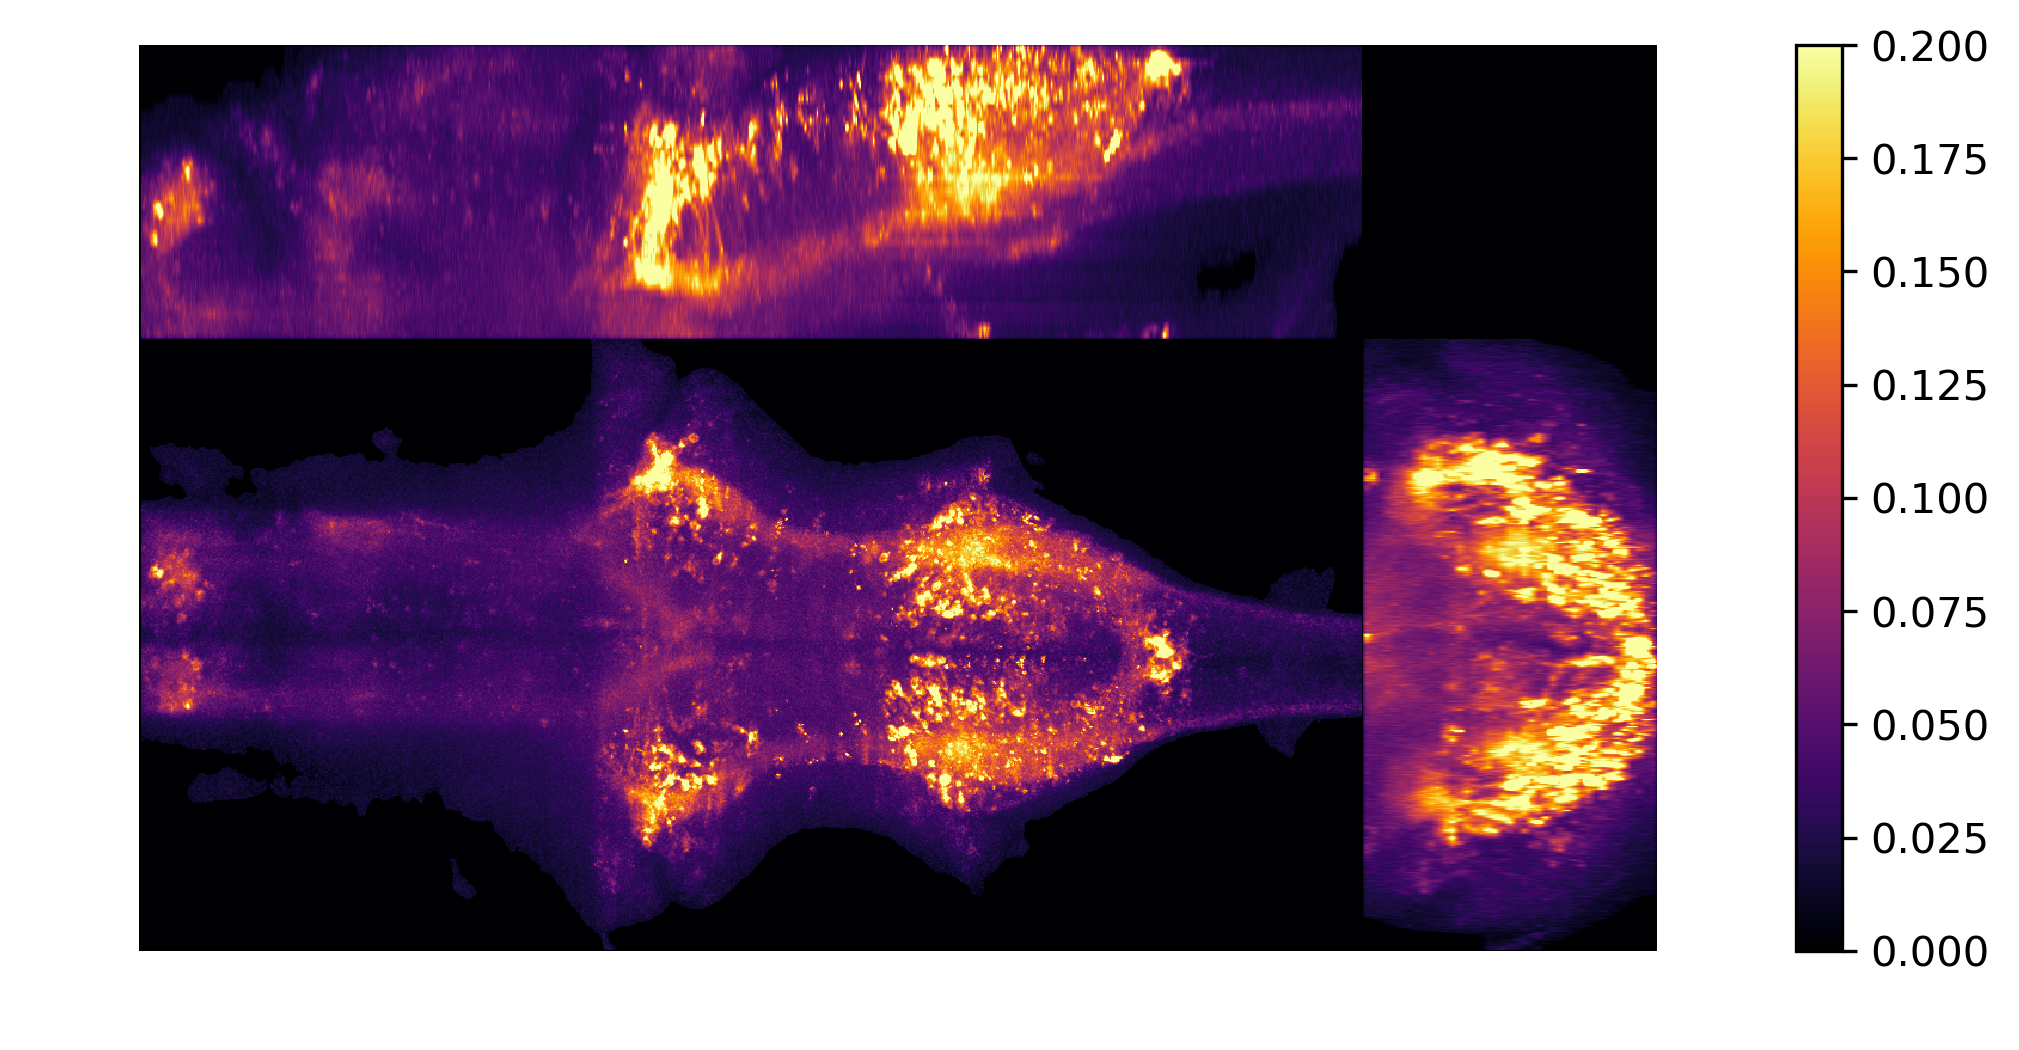

In [57]:
fig, axs = plt.subplots(dpi=300, figsize=(12,4))
im = axs.imshow(proj_fuse(data[1][14], np.max, aspect=(6,1,1)), origin='lower', cmap='inferno', clim=(0,.2))
axs.axis('off')
plt.colorbar(im, ax=axs)